# 1. Partion of r, r_drift and r_lock

________________
이론적인 Kr 그래프에서 self consistent 식을 풀면 K에 따른 r의 그래프를 얻을 수 있다. 
각각의 비율을 K에 따라서 구해보자

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Check_min_omega(m):
    Omega_D = lambda K,r : K*r
    Omega_P = lambda K,r,m : (4/np.pi)*np.sqrt((K*r)/m)
    Kspace = np.linspace(0.01,12.5,1000)
    Rspace = np.linspace(0.01,1,1000)
    KS,RS = np.meshgrid(Kspace,Rspace)
    OP = Omega_P(KS,RS,m)
    OD = Omega_D(KS,RS)
    MA = np.ma.masked_where(OD <= OP, OP)
    min_omega = MA.min()
    return min_omega

def K_R_Lorentzian_theorical(K,Kc):
    R = lambda k: np.sqrt(1-Kc/k)
    r = np.array([R(x) if x>Kc else 0 for x in K])
    return r
def Make_theorical_KR(Ks,m,d=1):
    def r_Case1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        pi = np.pi
        r_lock1 = (x/m**2)*((1/(pi*d**3))*np.log(np.sqrt(d**2+O_p**2)/O_p)-1/(2*pi*d*O_p**2))
        r_drift1 = (2/(pi*x))*(np.sqrt(d**2+x**2)*np.arctan(np.sqrt(d**2+x**2)*np.tan(t_p)/d)-d*t_p)
        return r_lock1+r_drift1
    def r_Case2(x,m,d):
        r_lock2 = (np.sqrt(d**2+x**2)-d)/x
        r_drift2 = (x/(m**2))*((1/(np.pi*d**3))*np.log(np.sqrt(d**2+x**2)/(x))-1/(2*np.pi*d*x**2))
        return r_lock2 + r_drift2
    X = np.logspace(np.log10(0.0001),np.log10(500),num=10000,base=10)
    
    KF =[]
    RF =[]
    KB =[]
    RB =[]

    for K_  in  Ks[::1]:
            i=0
            # plt.plot(X,X/K_)
            i+=1
            TEMP_2 = (X/K_)[abs(r_Case2(X,m,d)-X/K_)<1e-3]
            if len(TEMP_2)!=0:
                for R_ in TEMP_2:
                    KB.append(K_)
                    RB.append(R_)
            TEMP_1 = (X/K_)[abs(r_Case1(X,m,d)-X/K_)<1e-3]
            if len(TEMP_1)!=0:
                for R_ in TEMP_1:
                    KF.append(K_)
                    RF.append(R_)
    return KF,RF,KB,RB

def r_drift1_Kr(K,r,m,d=1):
    x= K*r
    pi = np.pi
    O_p = (4/np.pi)*np.sqrt(x/m)
    t_p = np.arcsin(O_p/x)
    r_drift1 = (2/(pi*x))*(np.sqrt(d**2+x**2)*np.arctan(np.sqrt(d**2+x**2)*np.tan(t_p)/d)-d*t_p)
    return r_drift1


def Make_theorical_KR_partion(Ks,m,d=1):
    pi = np.pi
    def r_drift1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        
        r_drift1 = (x/m**2)*((1/(pi*d**3))*np.log(np.sqrt(d**2+O_p**2)/O_p)-1/(2*pi*d*O_p**2))
        return r_drift1
    def r_lock1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        r_lock1 = (2/(pi*x))*(np.sqrt(d**2+x**2)*np.arctan(np.sqrt(d**2+x**2)*np.tan(t_p)/d)-d*t_p)
        return r_lock1
    
    def r_lock2(x,m,d):
        r_lock2 = (np.sqrt(d**2+x**2)-d)/x
        return r_lock2
    def r_drift2(x,m,d):
        r_drift2 = (x/(m**2))*((1/(np.pi*d**3))*np.log(np.sqrt(d**2+x**2)/(x))-1/(2*np.pi*d*x**2))
        return r_drift2
    def r_Case1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        pi = np.pi
        
        return r_lock1(x,m,d)+r_drift1(x,m,d)
    def r_Case2(x,m,d):
        return r_lock2(x,m,d) + r_drift2(x,m,d)
    X = np.logspace(np.log10(0.0001),np.log10(500),num=10000,base=10)
    
    KF =[]
    RF =[]
    RF_drift = []
    RB_drift = []
    RF_lock = []
    RB_lock = []
    
    KB =[]
    RB =[]

    for K_  in  Ks[::1]:
            i=0
            # plt.plot(X,X/K_)
            i+=1
            TEMP_2 = (X/K_)[abs(r_Case2(X,m,d)-X/K_)<1e-3]
            if len(TEMP_2)!=0:
                for R_ in TEMP_2:
                    x = K_*R_
                    KB.append(K_)
                    RB.append(R_)
                    r_d2 = r_drift2(x,m,d)
                    r_l2 = r_lock2(x,m,d)
                    RB_drift.append(r_d2)
                    RB_lock.append(r_l2)
            TEMP_1 = (X/K_)[abs(r_Case1(X,m,d)-X/K_)<1e-3]
            if len(TEMP_1)!=0:
                for R_ in TEMP_1:
                    x = K_*R_
                    
                    KF.append(K_)
                    RF.append(R_)
                    r_d1 = r_drift1(x,m,d)
                    r_l1 = r_lock1(x,m,d)
                    RF_drift.append(r_d1)
                    RF_lock.append(r_l1)
    KF,RF,RF_lock,RF_drift,KB,RB,RB_lock,RB_drift = map(np.array,[KF,RF,RF_lock,RF_drift,KB,RB,RB_lock,RB_drift])
    return KF,RF,RF_lock,RF_drift,KB,RB,RB_lock,RB_drift


In [2]:
def Make_theorical_KR_partion2(Ks,m,d=1):
    pi = np.pi
    def r_drift1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        
        r_drift1 = (x/m**2)*((1/(pi*d**3))*np.log(np.sqrt(d**2+O_p**2)/O_p)-1/(2*pi*d*O_p**2))
        return r_drift1
    def r_lock1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        r_lock1 = (2/(pi*x))*(np.sqrt(d**2+x**2)*np.arctan(np.sqrt(d**2+x**2)*np.tan(t_p)/d)-d*t_p)
        return r_lock1
    
    def r_lock2(x,m,d):
        r_lock2 = (np.sqrt(d**2+x**2)-d)/x
        return r_lock2
    def r_drift2(x,m,d):
        r_drift2 = (x/(m**2))*((1/(np.pi*d**3))*np.log(np.sqrt(d**2+x**2)/(x))-1/(2*np.pi*d*x**2))
        return r_drift2
    def r_Case1(x,m,d):
        O_p = (4/np.pi)*np.sqrt(x/m)
        t_p = np.arcsin(O_p/x)
        pi = np.pi
        
        return r_lock1(x,m,d)+r_drift1(x,m,d)
    def r_Case2(x,m,d):
        return r_lock2(x,m,d) + r_drift2(x,m,d)
    X = np.logspace(np.log10(0.01),np.log10(500),num=10000,base=10)
    
    KF =[]
    RF =[]
    
    KB =[]
    RB =[]
    
    KF_drift = []
    RF_drift = []    
    KB_drift = []
    RB_drift = []
    KF_lock = []
    RF_lock = []
    KB_lock = []
    RB_lock = []

    for K_  in  Ks[::1]:
            i=0
            # plt.plot(X,X/K_)
            i+=1
            TEMP_drift2 = (X/K_)[abs(r_drift2(X,m,d)-X/K_)<1e-3]
            if len(TEMP_drift2)!=0:
                for R_ in TEMP_drift2:
                    KB_drift.append(K_)
                    RB_drift.append(R_)
            TEMP_lock2 = (X/K_)[abs(r_lock2(X,m,d)-X/K_)<1e-3]
            if len(TEMP_lock2)!=0:
                for R_ in TEMP_lock2:
                    KB_lock.append(K_)
                    RB_lock.append(R_)
                    
            TEMP_drift1 = (X/K_)[abs(r_drift1(X,m,d)-X/K_)<1e-3]
            if len(TEMP_drift1)!=0:
                for R_ in TEMP_drift1:
                    KF_drift.append(K_)
                    RF_drift.append(R_)
            TEMP_lock1 = (X/K_)[abs(r_lock1(X,m,d)-X/K_)<1e-3]
            if len(TEMP_lock1)!=0:
                for R_ in TEMP_lock1:
                    KF_lock.append(K_)
                    RF_lock.append(R_)

    KF_lock,KF_drift,RF_lock,RF_drift,KB_lock,KB_drift,RB_lock,RB_drift = map(np.array,[KF_lock,KF_drift,RF_lock,RF_drift,KB_lock,KB_drift,RB_lock,RB_drift])
    return KF_lock,KF_drift,RF_lock,RF_drift,KB_lock,KB_drift,RB_lock,RB_drift


In [21]:
Ks = np.linspace(1,13,1000)
m = 2
d = 1
KF_lock,KF_drift,RF_lock,RF_drift,KB_lock,KB_drift,RB_lock,RB_drift = Make_theorical_KR_partion2(Ks,m,d=d)
KF,RF,KB,RB = Make_theorical_KR(Ks,m,d=d)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\3722096001.py:5: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\3722096001.py:11: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\2579378693.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


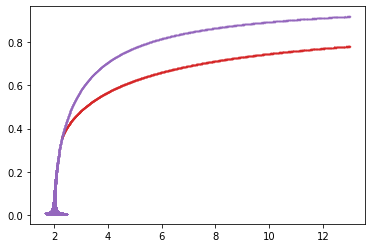

In [22]:
# RF_lock
plt.scatter(KF_lock,RF_lock,s=0.1,color = 'tab:red',alpha=1.0)
# plt.scatter(KF,RF,s=0.1,color = 'tab:orange',alpha=1.0)
# plt.scatter(KF_drift,RF_drift,s=0.1,color = 'tab:orange',alpha=1.0)
# plt.ylim(0,1)
# plt.scatter(KF,RF_drift+RF_lock,s=0.1)

plt.scatter(KB_lock,RB_lock,s=0.1,color = 'tab:purple',alpha=1.0) 
# plt.scatter(KB,RB,s=0.1,color = 'tab:blue',alpha=1.0)
# plt.scatter(KB_drift,RB_drift,s=0.1,color = 'tab:purple',alpha=0.1)
# plt.scatter(KF,RF,s=0.1) 
# plt.scatter(KB,RB,s=0.1) 

# plt.scatter(KB,RB,s=0.1)

In [24]:
KF_lock[0],KF[0]

(2.285285285285285, 2.4174174174174174)

In [12]:
KF,RF,RF_lock,RF_drift,KB,RB,RB_lock,RB_drift = Make_theorical_KR_partion(Ks,m,d=d)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\2579378693.py:86: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\2579378693.py:74: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_34012\2579378693.py:68: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


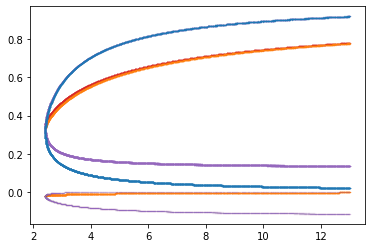

In [13]:
# RF_lock
plt.scatter(KF,RF_lock,s=0.1,color = 'tab:red',alpha=1.0)
plt.scatter(KF,RF,s=0.1,color = 'tab:orange',alpha=1.0)
plt.scatter(KF,RF_drift,s=0.1,color = 'tab:orange',alpha=1.0)
# plt.ylim(0,1)
# plt.scatter(KF,RF_drift+RF_lock,s=0.1)

plt.scatter(KB,RB_lock,s=0.1,color = 'tab:purple',alpha=1.0) 
plt.scatter(KB,RB,s=0.1,color = 'tab:blue',alpha=1.0)
plt.scatter(KB,RB_drift,s=0.1,color = 'tab:purple',alpha=0.1)
# plt.scatter(KF,RF,s=0.1) 
# plt.scatter(KB,RB,s=0.1) 

# plt.scatter(KB,RB,s=0.1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f07c9bcfd0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f07c9bcf40>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f07c9bde40>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f07c9be260>}

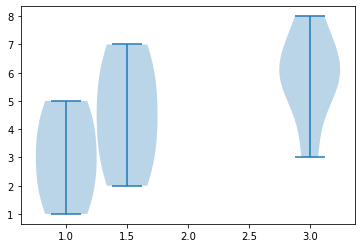

In [28]:
plt.violinplot([[1,2,3,4,5],[2,3,4,5,6,7],[3,5,6,6,7,8,6]],[1,1.5,3])

# draw K vs r and extract r_drift and r_lock

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.for_ensemble import *
import parmap 
from tqdm.notebook import tqdm
from TO_sim.Utility import Create_Folder
DF = 'Review/22.11.11/' # default_folder 
Create_Folder(DF)

In [25]:
def make_r1d(K,r,m,d=1):
    # K가 증가하는 과정 , desynchronized
    K,r = map(np.array,[K,r])
    o_p = (4/np.pi)*np.sqrt(K*r/m)
    # A(B+C)
    A = K*r/(m**2)
    B = (1/(np.pi*d**3))*np.log(np.sqrt(d**2+o_p**2)/o_p)
    C = 1/(2*np.pi*d*o_p**2)
    r1d = A*(B-C)
    return K,r1d

def make_r1s(K,r,m,d=1):
    # K가 증가하는 과정, synchronized
    K,r = map(np.array,[K,r])
    o_p = (4/np.pi)*np.sqrt(K*r/m)
    t_p = np.arcsin(o_p/(K*r))
    pi = np.pi
    # A(B+C)
    A = 2/(pi*K*r)
    sqrt_ = np.sqrt(d**2 + (K*r)**2)
    B = sqrt_*np.arctan(sqrt_ /d* np.tan(t_p))
    
    
    C = - d*t_p
    r1s = A*(B+C)
    return K,r1s


def make_r2d(K,r,m,d=1):
    # K가 감소하는 과정 , desynchronized
    K,r = map(np.array,[K,r])
    o_d = K*r
    # A(B+C)
    A = K*r/(m**2)
    B = (1/(np.pi*d**3))*np.log(np.sqrt(d**2+o_d**2)/o_d)
    C = 1/(2*np.pi*d*o_d**2)
    r2d = A*(B-C)
    return K,r2d

def make_r2s(K,r,m,d=1):
    # K가 감소하는 과정 , synchronized
    K,r = map(np.array,[K,r])
    o_d = K*r
    # A(B+C)
     
    r2s = (np.sqrt(d**2+(K*r)**2) - d)/(K*r)
    return K,r2s

In [243]:
from TO_sim.Check_theorical import *
m = 0.95
def Draw_case12_KR(m):
    Ks = np.linspace(1,13,1000)
    KF,RF,KB,RB = map(np.array,Make_theorical_KR(Ks,m))
    return KF,RF,KB,RB
KF,RF,KB,RB =Draw_case12_KR(m)

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


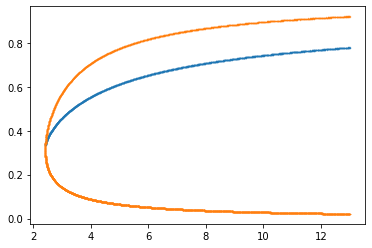

In [238]:
plt.scatter(KF,RF,s=0.1)
plt.scatter(KB,RB,s=0.1)

In [231]:
KF,RFD =make_r1d(KF,RF,m)
KF,RFS =make_r1s(KF,RF,m)

KB,RBD =make_r2d(KB,RB,m)
KB,RBS =make_r2s(KB,RB,m)

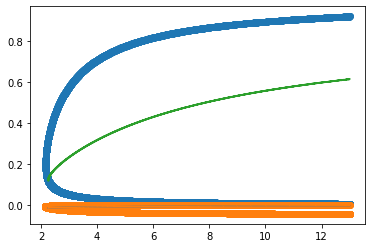

In [232]:
plt.plot(KF,RFD)
plt.plot(KF,RFD)
plt.plot(KF,RF)
plt.scatter(KB,RB)
plt.scatter(KB,RBD)
# plt.plot(KF,RFS)

In [244]:
A = RB[0]
idx = np.where(RB>A)
notidx = np.where(RB<A)
B = RB[idx]
RBU = RB[idx]
KBU = KB[idx]
RBD = RB[notidx]
KBD = KB[notidx]

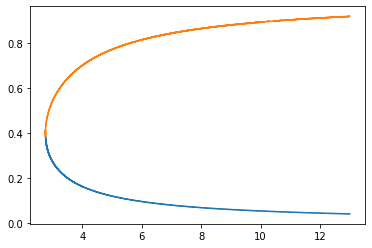

In [245]:
plt.plot(KBD,RBD)
plt.plot(KBU,RBU)

In [246]:
KBU,RBDU =make_r2d(KBU,RBU,m)
KBU,RBSU =make_r2s(KBU,RBU,m)

KBD,RBDD =make_r2d(KBD,RBD,m)
KBD,RBSD =make_r2s(KBD,RBD,m)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_10180\622124891.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


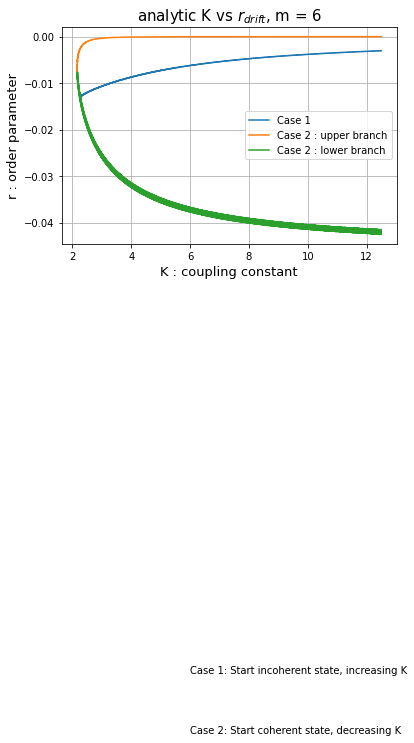

In [213]:
plt.plot(KF,RFD,label='Case 1')
plt.plot(KBU,RBDU,label='Case 2 : upper branch')
plt.plot(KBD,RBDD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r_{drift}$, '+ f'm = {m}',fontsize=15)
plt.text(6,-0.137,'Case 1: Start incoherent state, increasing K')
plt.text(6,-0.15,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.savefig(DF+f'm = {m}, analytic K vs r_drift.png',dpi=400)
# plt.plot(KBU,RBSU)

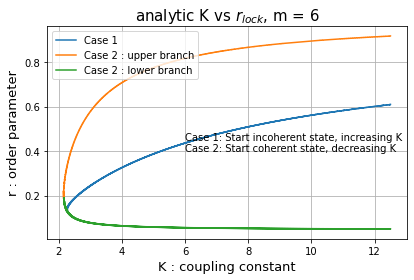

In [214]:
plt.plot(KF,RFS,label='Case 1')
plt.plot(KBU,RBSU,label='Case 2 : upper branch')
plt.plot(KBD,RBSD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r_{lock}$, '+ f'm = {m}',fontsize=15)
plt.text(6,0.45,'Case 1: Start incoherent state, increasing K')
plt.text(6,0.4,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.savefig(DF+f'm = {m}, analytic K vs r_lock.png',dpi=400)

# plt.plot(KBU,RBSU)

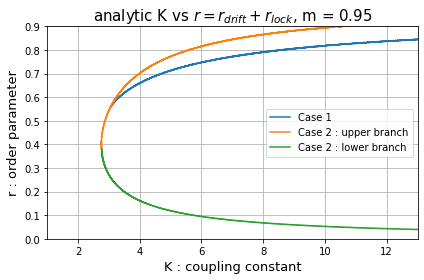

In [247]:
plt.figure()
plt.plot(KF,RF,label='Case 1')
plt.plot(KBU,RBU,label='Case 2 : upper branch')
plt.plot(KBD,RBD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r = r_{drift}+r_{lock}$, '+ f'm = {m}',fontsize=15)
# plt.text(5,0.25,'Case 1: Start incoherent state, increasing K')
# plt.text(5,0.2,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.ylim(0,0.9)
plt.xlim(1,13)
plt.tight_layout()
plt.savefig(DF+f'm = {m}, analytic K vs r.png',dpi=400,transparent=True)

# plt.plot(KBU,RBSU)

<BarContainer object of 1 artists>

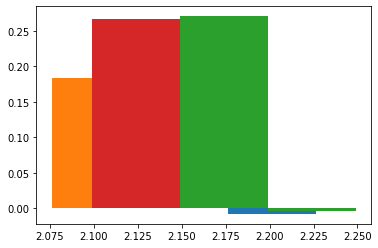

In [216]:
sets = [KB[0],RBDU[0]]
plt.bar([KB[0],KB[0]+0.05],height = [RBSU[0],RBDU[0]],width=0.05)
plt.bar([KB[0]-0.05],height = [B[0]],width=0.05)

plt.bar([KB[500],KB[500]+0.05],height = [RBSU[500],RBDU[500]],width=0.05)
plt.bar([KB[500]-0.05],height = [B[500]],width=0.05)

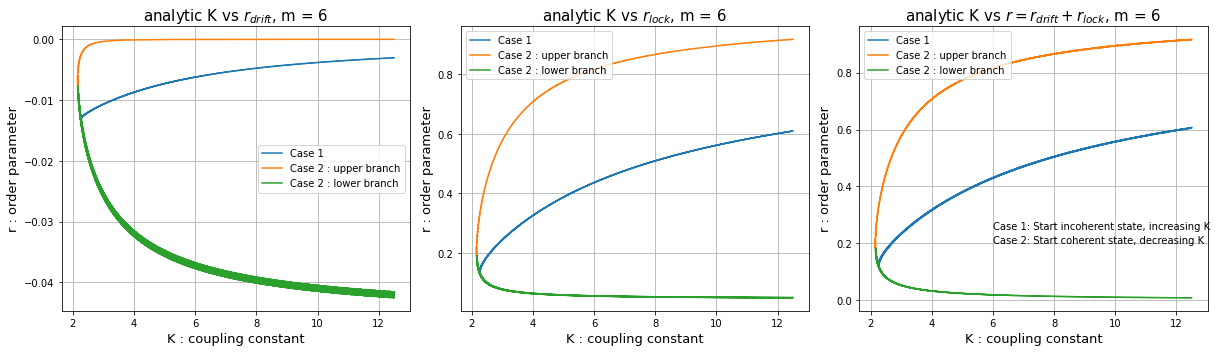

In [217]:
plt.figure(figsize=(17,5),facecolor='white')
plt.subplot(1,3,1)
plt.plot(KF,RFD,label='Case 1')
plt.plot(KBU,RBDU,label='Case 2 : upper branch')
plt.plot(KBD,RBDD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r_{drift}$, '+ f'm = {m}',fontsize=15)
# plt.text(6,-0.137,'Case 1: Start incoherent state, increasing K')
# plt.text(6,-0.15,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,2)
plt.plot(KF,RFS,label='Case 1')
plt.plot(KBU,RBSU,label='Case 2 : upper branch')
plt.plot(KBD,RBSD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r_{lock}$, '+ f'm = {m}',fontsize=15)
# plt.text(6,0.45,'Case 1: Start incoherent state, increasing K')
# plt.text(6,0.4,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,3)
plt.plot(KF,RF,label='Case 1')
plt.plot(KBU,RBU,label='Case 2 : upper branch')
plt.plot(KBD,RBD,label='Case 2 : lower branch')
plt.legend()
plt.xlabel('K : coupling constant',fontsize=13)
plt.ylabel('r : order parameter',fontsize=13)
plt.title('analytic K vs $r = r_{drift}+r_{lock}$, '+ f'm = {m}',fontsize=15)
plt.text(6,0.25,'Case 1: Start incoherent state, increasing K')
plt.text(6,0.2,'Case 2: Start coherent state, decreasing K')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.savefig(DF+f'm = {m}, analytic K vs r total.png',dpi=400)

# plt.savefig(DF+f'm = {m}, analytic K vs r_drift.png',dpi=400)
# plt.plot(KBU,RBSU)